# IMDB Movie Review Classification

In [35]:
#import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import re
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\bayu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Data Extraction

In [12]:
imdb = pd.read_csv('IMDB_Dataset_Train.csv')
imdb.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [13]:
df = pd.DataFrame(imdb)
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


## Text Processing

In [21]:
# rename "(<.*?>)" markup
komentar = df['review'].apply(lambda x: re.sub('(<.*?>)', ' ', x))

# remove punctuation marks
komentar = df['review'].apply(lambda x: re.sub('[,\.!?:()"]', '', x))

# remove whitespace
komentar = df['review'].apply(lambda x: x.strip())

# remove all strings that contain a non-letter
komentar = df['review'].apply(lambda x: re.sub('[^a-zA-Z"]', ' ', x))

# convert to lower
komentar = df['review'].apply(lambda x: x.lower())

In [22]:
lemmatizer = WordNetLemmatizer()
komentar = df['review'].apply(lambda x: lemmatizer.lemmatize(x))

In [23]:
#tokenization
komentar = komentar.apply(lambda x: " ".join(lemmatizer.lemmatize(x) for x in x.split()))

In [24]:
#ubah data sentimen menjadi numerik
sentimen = df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)
sentimen.head()

0    1
1    1
2    1
3    0
4    1
Name: sentiment, dtype: int64

## Support Vector Machine Model

In [25]:
#split data
X_train, X_test, y_train, y_test = train_test_split(komentar, sentimen, test_size = 0.2, random_state = 0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(40000,)
(40000,)
(10000,)
(10000,)


In [26]:
#TFIDFVectorizer
tfid = TfidfVectorizer()
vector_x_train = tfid.fit_transform(X_train) 
vector_x_test = tfid.transform(X_test)

In [27]:
#perform classification with SVM, kernel=linear
classifier_svc = svm.SVC(kernel = 'linear')
classifier_svc.fit(vector_x_train, y_train)

SVC(kernel='linear')

In [28]:
#implementasi model ke data testing
y_pred = classifier_svc.predict(vector_x_test)

In [29]:
#evaluasi model dengan metrics
metrics.accuracy_score(y_test, y_pred)

0.8972

Text(83.40000000000006, 0.5, 'predicted label')

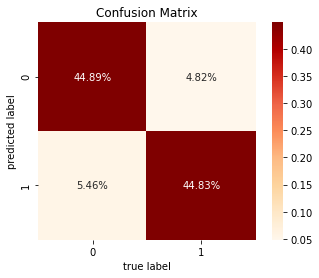

In [43]:
#evaluasi model dengan confusion matrix
mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T/np.sum(mat.T), square = True, annot = True, fmt = '.2%', cbar = True, cmap = 'OrRd')
plt.title("Confusion Matrix")
plt.xlabel('true label')
plt.ylabel('predicted label')